# I ended up not using this data set in the end, as the correlations were very weak

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
sns.set_style("dark")

In [3]:
df = pd.read_csv('steam.csv', sep=',')

In [4]:
df.pop('appid')
# Convert english too boolean
df['english'] = df['english'].astype('bool')
# set release date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
# create 3 seperate platform fields instead of 1
df['windows'], df['mac'], df['linux'] = df['platforms'].apply(lambda x: 'windows' in x),df['platforms'].apply(lambda x: 'mac' in x),df['platforms'].apply(lambda x: 'linux' in x)
df.drop(columns='platforms', inplace=True)
df['owners_low'] = df['owners'].apply(lambda x: x.split('-')[0]).astype('int')
df['owners_high'] = df['owners'].apply(lambda x: x.split('-')[1]).astype('int')
df['release_year'] = df['release_date'].dt.year
df.drop(columns='owners', inplace=True)
genres = df['genres'].apply(lambda x: x.split(';')[0])

In [5]:
medianPlaytimeFilter = df['median_playtime']> 0.5
ownersFilter = df['owners_low'] > 20000 #lowest range above 0
reviewFilter = df['positive_ratings'] > 5
noFreeGameFilter = df['price'] > 0.1

In [6]:
gameCorrelations = df.corr()
gameCorrelations.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

C:\Users\Stijn\AppData\Local\Temp/ipykernel_16724/4049258250.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  gameCorrelations.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,windows,mac,linux,owners_low,owners_high,release_year
english,1.00,0.00,0.01,0.01,0.01,0.00,-0.00,0.01,-0.00,0.06,0.06,0.01,0.01,-0.09
required_age,0.00,1.00,-0.01,0.06,0.06,0.03,0.01,0.12,-0.04,-0.03,-0.02,0.07,0.08,-0.08
achievements,0.01,-0.01,1.00,0.01,0.00,0.01,0.01,-0.01,0.00,-0.02,-0.01,0.00,0.00,0.03
positive_ratings,0.01,0.06,0.01,1.00,0.76,0.16,0.04,0.04,0.00,0.03,0.04,0.71,0.71,-0.06
negative_ratings,0.01,0.06,0.00,0.76,1.00,0.16,0.05,0.05,0.00,0.01,0.02,0.70,0.69,-0.03
average_playtime,0.00,0.03,0.01,0.16,0.16,1.00,0.91,0.05,0.00,0.03,0.03,0.17,0.17,-0.05
median_playtime,-0.00,0.01,0.01,0.04,0.05,0.91,1.00,0.04,0.00,0.02,0.02,0.04,0.04,-0.03
price,0.01,0.12,-0.01,0.04,0.05,0.05,0.04,1.00,0.00,0.02,0.01,0.03,0.03,-0.06
windows,-0.00,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.01,-0.01,0.00,0.00,0.00
mac,0.06,-0.03,-0.02,0.03,0.01,0.03,0.02,0.02,-0.01,1.00,0.63,0.04,0.04,-0.09


In [7]:
correlation2 = df[['owners_high','positive_ratings']]
correlation2.corr()

,owners_high,positive_ratings
owners_high,1.000000,0.712447
positive_ratings,0.712447,1.000000


<AxesSubplot:xlabel='owners_high', ylabel='positive_ratings'>

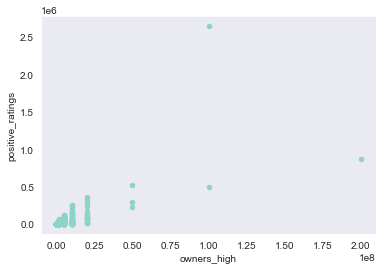

In [8]:
df.plot(kind='scatter', x='owners_high',y='positive_ratings')

<AxesSubplot:xlabel='owners_high', ylabel='positive_ratings'>

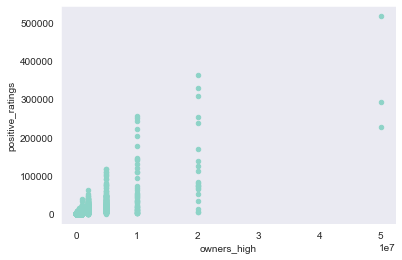

In [9]:
df[df['owners_high'] < 100000000].plot(kind='scatter', x='owners_high',y='positive_ratings')

It does match my expectation, as you will have more (positive) reviews if more people play your game